# Trabajo de Frank

## Problema

El problema consiste en predecir la probabilidad de atraso de los vuelos que aterrizan o despegan del aeropuerto de Santiago
de Chile (SCL). Para eso les entregamos un dataset usando datos públicos y reales donde cada fila corresponde a un vuelo
que aterrizó o despegó de SCL. Para cada vuelo se cuenta con la siguiente información:

* **Fecha-I** : Fecha y hora programada del vuelo.
* **Vlo-I** : Número de vuelo programado.
* **Ori-I** : Código de ciudad de origen programado.
* **Des-I** : Código de ciudad de destino programado.
* **Emp-I** : Código aerolínea de vuelo programado.
* **Fecha-O** : Fecha y hora de operación del vuelo.
* **Vlo-O** : Número de vuelo de operación del vuelo.
* **Ori-O** : Código de ciudad de origen de operación
* **Des-O** : Código de ciudad de destino de operación.
* **Emp-O** : Código aerolínea de vuelo operado.
* **DIA** : Día del mes de operación del vuelo.
* **MES** : Número de mes de operación del vuelo.
* **AÑO** : Año de operación del vuelo.
* **DIANOM** : Día de la semana de operación del vuelo.
* **TIPOVUELO** : Tipo de vuelo, I =Internacional, N =Nacional.
* **OPERA** : Nombre de aerolínea que opera.
* **SIGLAORI** : Nombre ciudad origen.
* **SIGLADES** : Nombre ciudad destino.

## Desarrollo

### 0. Obtención de datos

In [1]:
#Se importan las librerías necesarias para el problema
import latam_airlines_mle.utils.paths as path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msng
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
df = pd.read_csv(path.data_raw_dir('dataset_SCL.csv'), low_memory=False)

In [3]:
df.shape

(68166, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68166 entries, 0 to 68165
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Fecha_I    68166 non-null  object 
 1   Vlo_I      68166 non-null  object 
 2   Des_I      68166 non-null  object 
 3   Emp_I      68166 non-null  object 
 4   Fecha_O    68166 non-null  object 
 5   Vlo_O      68166 non-null  object 
 6   Des_O      68166 non-null  object 
 7   Emp_O      68166 non-null  object 
 8   DIA        68166 non-null  float64
 9   MES        68166 non-null  float64
 10  AÑO        68166 non-null  float64
 11  DIANOM     68166 non-null  object 
 12  TIPOVUELO  68166 non-null  object 
 13  OPERA      68166 non-null  object 
 14  SIGLADES   68166 non-null  object 
dtypes: float64(3), object(12)
memory usage: 7.8+ MB


<AxesSubplot:>

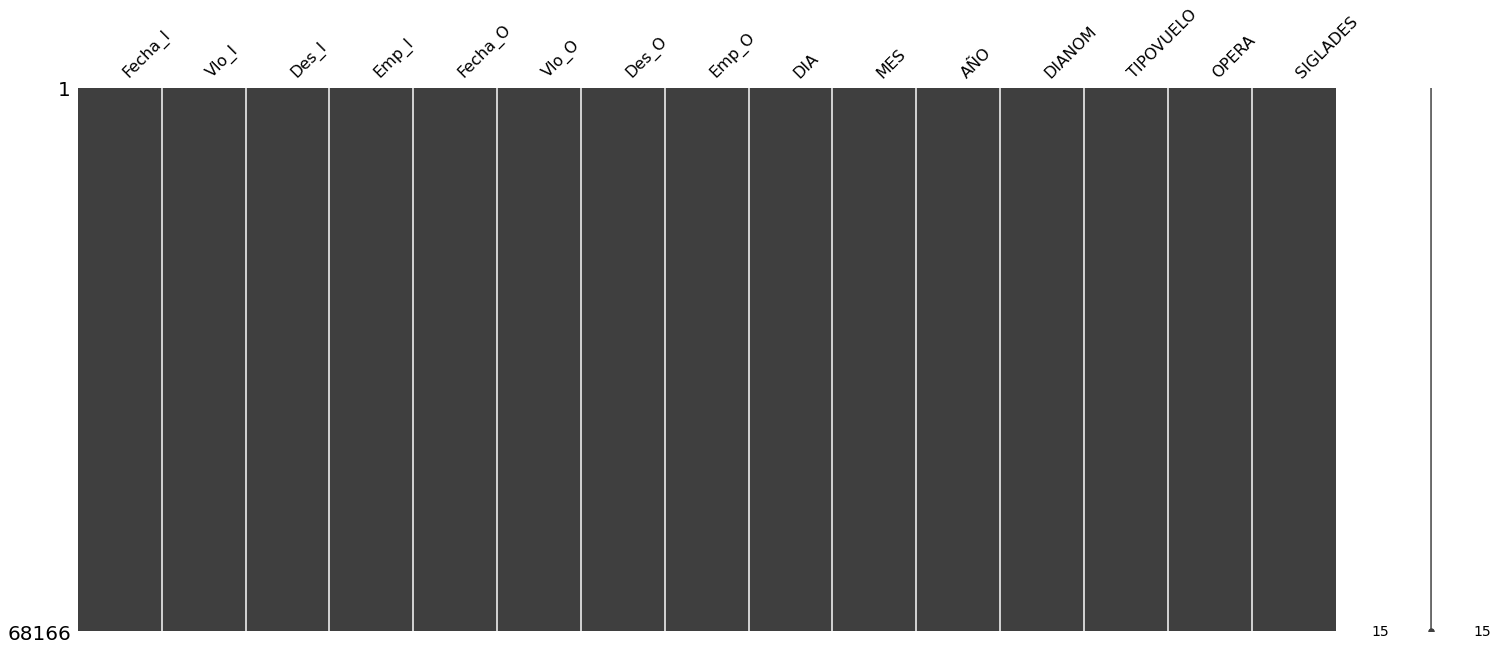

In [5]:
msng.matrix(df)

In [6]:
df.describe()

,DIA,MES,AÑO
count,68166.000000,68166.000000,68166.000000
mean,15.714858,6.620441,2017.000029
std,8.782890,3.522743,0.005417
min,1.000000,1.000000,2017.000000
25%,8.000000,3.000000,2017.000000
50%,16.000000,7.000000,2017.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


### 1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

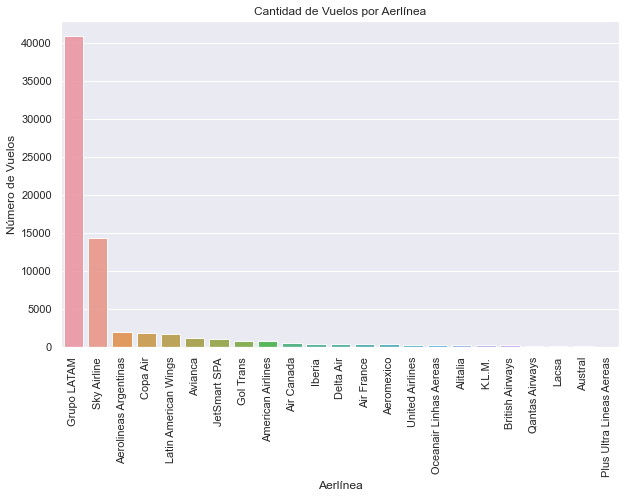

In [7]:
vuelos_aerolineas = df['OPERA'].value_counts()
plt.figure(figsize = (10,6))
sns.set(style="darkgrid")
sns.barplot(vuelos_aerolineas.index, vuelos_aerolineas.values, alpha=0.9)
plt.title('Cantidad de Vuelos por Aerlínea')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Aerlínea', fontsize=12)
plt.xticks(rotation=90)
plt.show()

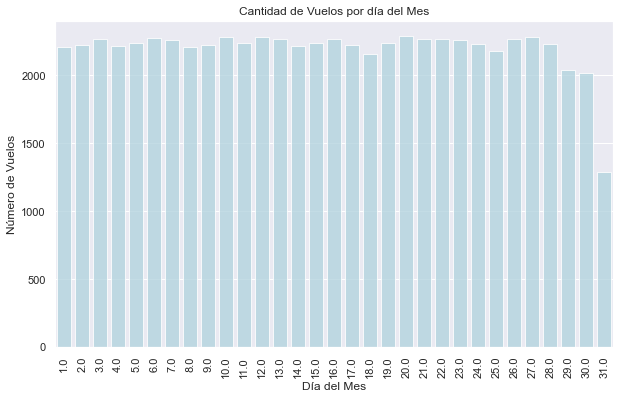

In [8]:
vuelos_dia = df['DIA'].value_counts()
plt.figure(figsize = (10,6))
sns.set(style = "darkgrid")
sns.barplot(vuelos_dia.index, vuelos_dia.values, color = 'lightblue', alpha=0.8)
plt.title('Cantidad de Vuelos por día del Mes')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Día del Mes', fontsize=12)
plt.xticks(rotation=90)
plt.show()

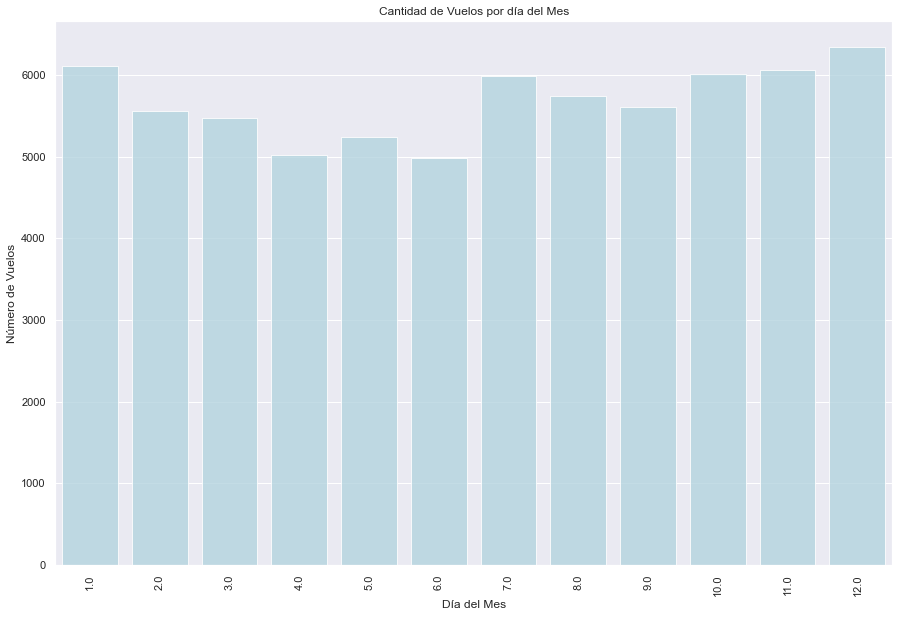

In [9]:
vuelos_mes = df['MES'].value_counts()
sns.set(style = "darkgrid")
sns.barplot(vuelos_mes.index, vuelos_mes.values, color = 'lightblue', alpha=0.8)
plt.title('Cantidad de Vuelos por día del Mes')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Día del Mes', fontsize=12)
plt.xticks(rotation=90)
plt.show()

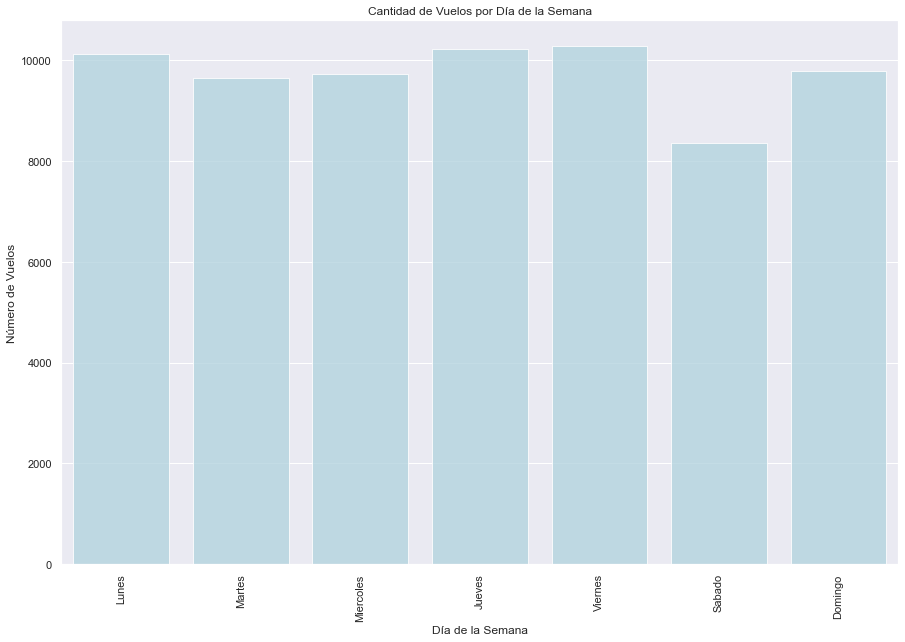

In [10]:
vuelos = df['DIANOM'].value_counts()
dias = [vuelos.index[2], vuelos.index[5], vuelos.index[4], vuelos.index[1], vuelos.index[0], vuelos.index[6], vuelos.index[3]]
valores_dias = [vuelos.values[2], vuelos.values[5], vuelos.values[4], vuelos.values[1], vuelos.values[0], vuelos.values[6], vuelos.values[3]]

sns.set(style="darkgrid")
sns.barplot(dias, valores_dias, color = 'lightblue', alpha=0.8)
plt.title('Cantidad de Vuelos por Día de la Semana')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Día de la Semana', fontsize=12)
plt.xticks(rotation=90)
plt.show()

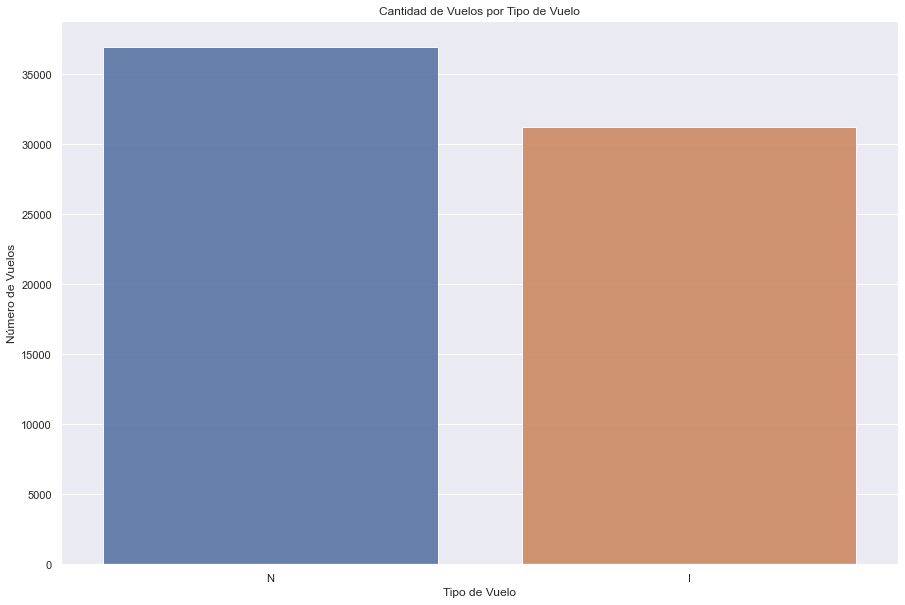

In [11]:
vuelos = df['TIPOVUELO'].value_counts()
sns.set(style="darkgrid")
sns.barplot(vuelos.index, vuelos.values, alpha=0.9)
plt.title('Cantidad de Vuelos por Tipo de Vuelo')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Tipo de Vuelo', fontsize=12)
plt.show()

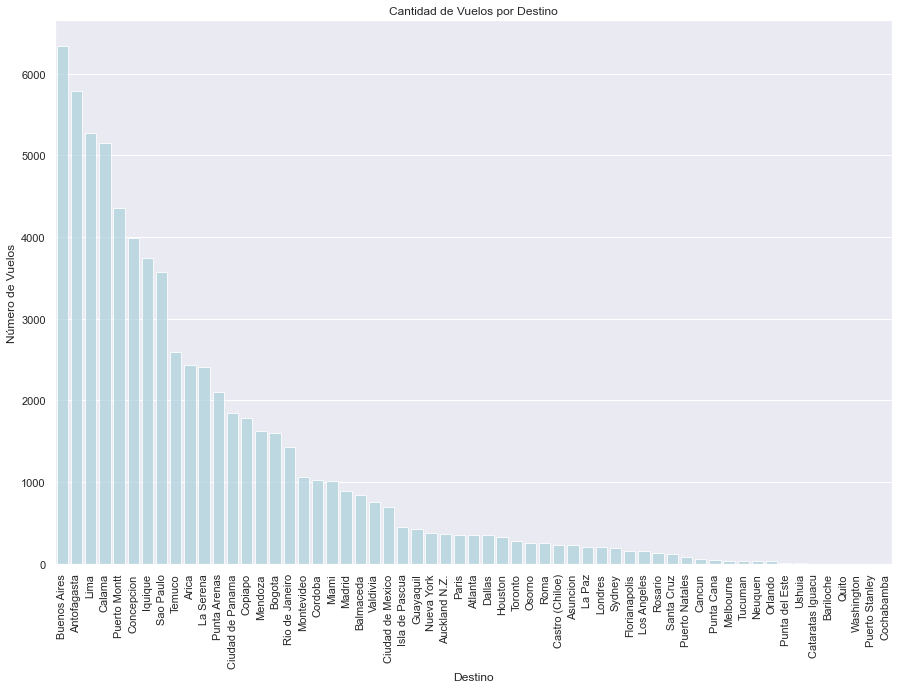

In [12]:
vuelos = df['SIGLADES'].value_counts()
sns.set(style="darkgrid")
sns.barplot(vuelos.index, vuelos.values, color = 'lightblue', alpha=0.8)
plt.title('Cantidad de Vuelos por Destino')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Destino', fontsize=12)
plt.xticks(rotation=90)

plt.show()

Respecto a las distribuciones, se puede ver que dentro de todo la data está distribuida de manera bastante balanceada. De todas formas se pueden notar ciertas particularidades en algunas columnas: 
* En las aerolíneas LATAM Airlines es la con mayor cantidad de vuelo debido a que es la más grande aquí en chile y es la que tiene mayor cantidad de destinos. SKY Airlines sería la segunda más grande y de ahí en adelante las demás son bastante similares en cuanto a vuelos. 
* En cuanto a los días del mes, se puede ver como el día 31 tiene menor cantidad que los demás días y esto se puede deber a que hay menos días 31 durante el año.
* Con los días de semana, el día sábado es el único en el que se nota una diferencia. Aquí puede ser porque la gente prefiere ese día para quedarse en donde sea que esté y aprovecharlo en caso que esté de viaje para poder recorrer o solamente descansar.
* Por parte de los destinos se puede ver que gran parte se lo llevan las ciudades chilenas del norte. Esto puede ser por un alto flujo en minería.

### 2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :

* **temporada_alta** : 1 si **Fecha-I** está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no

In [13]:
from datetime import datetime

def temporada_alta(fecha):
    fecha_año = int(fecha.split('-')[0])
    fecha = datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S')
    range1_min = datetime.strptime('15-Dec', '%d-%b').replace(year = fecha_año)
    range1_max = datetime.strptime('31-Dec', '%d-%b').replace(year = fecha_año)
    range2_min = datetime.strptime('1-Jan', '%d-%b').replace(year = fecha_año)
    range2_max = datetime.strptime('3-Mar', '%d-%b').replace(year = fecha_año)
    range3_min = datetime.strptime('15-Jul', '%d-%b').replace(year = fecha_año)
    range3_max = datetime.strptime('31-Jul', '%d-%b').replace(year = fecha_año)
    range4_min = datetime.strptime('11-Sep', '%d-%b').replace(year = fecha_año)
    range4_max = datetime.strptime('30-Sep', '%d-%b').replace(year = fecha_año)
    
    if ((fecha >= range1_min and fecha <= range1_max) or 
        (fecha >= range2_min and fecha <= range2_max) or 
        (fecha >= range3_min and fecha <= range3_max) or
        (fecha >= range4_min and fecha <= range4_max)):
        return 1
    else:
        return 0
    

In [14]:
df['temporada_alta'] = df['Fecha_I'].apply(temporada_alta)

In [15]:
df['temporada_alta'].value_counts()

0    46141
1    22025
Name: temporada_alta, dtype: int64

* **dif_min** : diferencia en minutos entre **Fecha-O** y **Fecha-I** .

In [16]:
def dif_min(data):
    fecha_o = datetime.strptime(data['Fecha_O'], '%Y-%m-%d %H:%M:%S')
    fecha_i = datetime.strptime(data['Fecha_I'], '%Y-%m-%d %H:%M:%S')
    dif_min = ((fecha_o - fecha_i).total_seconds())/60
    return dif_min
        

In [17]:
df['dif_min'] = df.apply(dif_min, axis = 1)

* **atraso_15** : 1 si **dif_min** > 15, 0 si no.

In [18]:
df['atraso_15'] = np.where(df['dif_min'] > 15, 1, 0)

In [19]:
df['atraso_15'].value_counts()

0    55560
1    12606
Name: atraso_15, dtype: int64

* **periodo_dia** : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a **Fecha-I**.

In [20]:
def get_periodo_dia(fecha):
    fecha_time = datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S').time()
    mañana_min = datetime.strptime("05:00", '%H:%M').time()
    mañana_max = datetime.strptime("11:59", '%H:%M').time()
    tarde_min = datetime.strptime("12:00", '%H:%M').time()
    tarde_max = datetime.strptime("18:59", '%H:%M').time()
    noche_min1 = datetime.strptime("19:00", '%H:%M').time()
    noche_max1 = datetime.strptime("23:59", '%H:%M').time()
    noche_min2 = datetime.strptime("00:00", '%H:%M').time()
    noche_max2 = datetime.strptime("4:59", '%H:%M').time()
    
    if(fecha_time > mañana_min and fecha_time < mañana_max):
        return 'mañana'
    elif(fecha_time > tarde_min and fecha_time < tarde_max):
        return 'tarde'
    elif((fecha_time > noche_min1 and fecha_time < noche_max1) or
         (fecha_time > noche_min2 and fecha_time < noche_max2)):
        return 'noche'

In [21]:
df['periodo_dia'] = df['Fecha_I'].apply(get_periodo_dia)

In [22]:
df[['temporada_alta','dif_min','atraso_15','periodo_dia']].to_csv(path.data_processed_dir('synthetic_features.csv'), index = False)

In [23]:
#transformamos la variable fecha a fecha y extraemos las hora y los minutos
df['Fecha_I'] = pd.to_datetime(df['Fecha_I'], format='%Y-%m-%d %H:%M:%S')
df['HORA']=df['Fecha_I'].dt.hour
# Creamos una variable minuto
df['MIN']=df['Fecha_I'].dt.minute

In [24]:
df.columns

Index(['Fecha_I', 'Vlo_I', 'Des_I', 'Emp_I', 'Fecha_O', 'Vlo_O', 'Des_O',
       'Emp_O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO', 'OPERA',
       'SIGLADES', 'temporada_alta', 'dif_min', 'atraso_15', 'periodo_dia',
       'HORA', 'MIN'],
      dtype='object')

In [25]:
df[['DIA','MES','HORA','MIN','temporada_alta','periodo_dia','DIANOM','Des_I','TIPOVUELO','OPERA','atraso_15']].to_csv(path.data_processed_dir('data_ready.csv'), index = False)

### 3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?

* ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?

In [45]:
def calcular_tasa(df, columna):
    
    dic_atrasos = {}
    for _, row in df.iterrows():
        if row['atraso_15'] == 1:
            if row[columna] not in dic_atrasos:
                dic_atrasos[row[columna]] = 1
            else:
                dic_atrasos[row[columna]] += 1
    
    total_values = df[columna].value_counts()
    
    dic_tasas = {}
    for name, total in total_values.iteritems():
        if name in dic_atrasos:
            dic_tasas[name] = round(total / dic_atrasos[name], 2)
        else:
            dic_tasas[name] = 0
            
    return pd.DataFrame.from_dict(data = dic_tasas, orient = 'index', columns = ['Tasa (%)'])

In [46]:
tasas_destinos = calcular_tasa(df, 'SIGLADES')
tasas_destinos

,Tasa (%)
Buenos Aires,3.91
Antofagasta,6.83
Lima,4.34
Calama,8.18
Puerto Montt,5.94
Concepcion,6.41
Iquique,5.85
Sao Paulo,4.05
Temuco,6.42
Arica,7.38


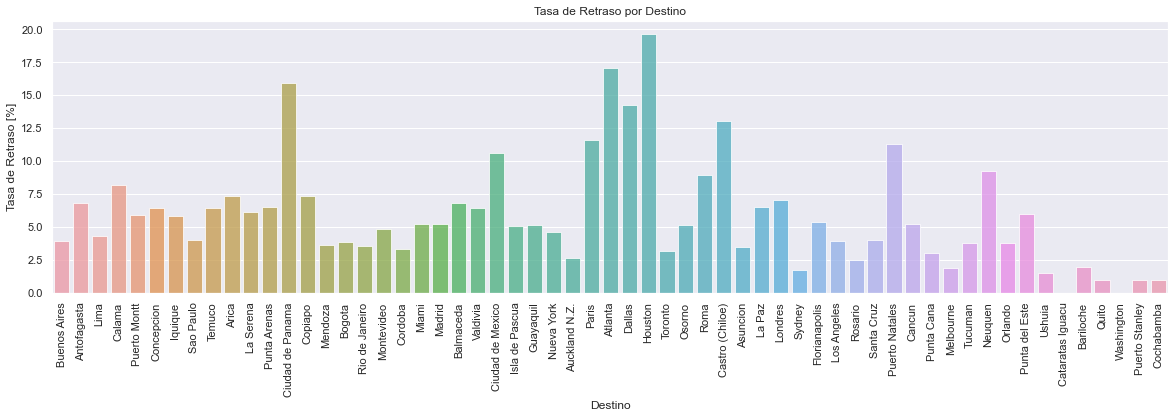

In [47]:
tasas_destinos_values = df['SIGLADES'].value_counts().index
plt.figure(figsize = (20,5))
sns.set(style="darkgrid")
sns.barplot(df['SIGLADES'].value_counts().index, tasas_destinos['Tasa (%)'], alpha = 0.75)
plt.title('Tasa de Retraso por Destino')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Destino', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [48]:
tasas_aerolineas = calcular_tasa(df, 'OPERA')
tasas_aerolineas

,Tasa (%)
Grupo LATAM,5.60
Sky Airline,5.63
Aerolineas Argentinas,4.16
Copa Air,15.95
Latin American Wings,2.46
Avianca,3.76
JetSmart SPA,5.59
Gol Trans,2.81
American Airlines,14.84
Air Canada,2.19


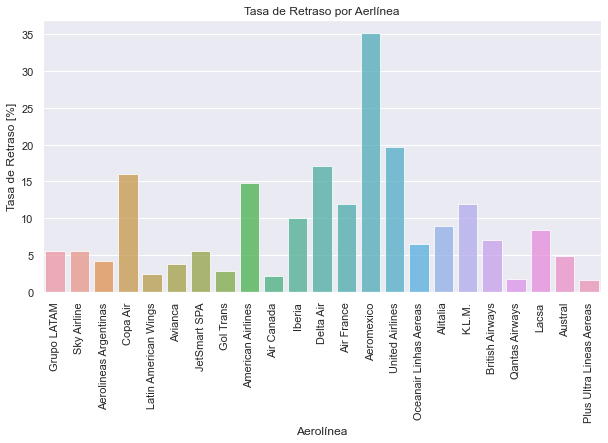

In [49]:
tasas_aerolineas_values = df['OPERA'].value_counts().index

plt.figure(figsize = (10,5))
sns.set(style="darkgrid")
sns.barplot(tasas_aerolineas_values, tasas_aerolineas['Tasa (%)'], alpha = 0.75)
plt.title('Tasa de Retraso por Aerlínea')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Aerolínea', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [50]:
tasas_meses = calcular_tasa(df, 'MES')
tasas_meses

,Tasa (%)
12.0,3.94
1.0,6.24
11.0,5.07
10.0,4.43
7.0,3.41
8.0,5.77
9.0,5.80
2.0,6.60
3.0,8.68
5.0,6.34


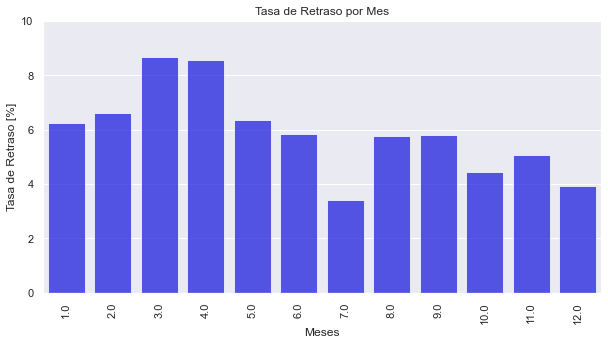

In [51]:
tasas_meses_values = df['MES'].value_counts().index

plt.figure(figsize = (10,5))
sns.set(style="darkgrid")
sns.barplot(tasas_meses_values, tasas_meses['Tasa (%)'], color = 'blue', alpha = 0.75)
plt.title('Tasa de Retraso por Mes')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Meses', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,10)
plt.show()

In [52]:
tasas_dias = calcular_tasa(df, 'DIANOM')
tasas_dias

,Tasa (%)
Viernes,4.51
Jueves,5.01
Lunes,4.95
Domingo,6.21
Miercoles,5.85
Martes,5.91
Sabado,6.13


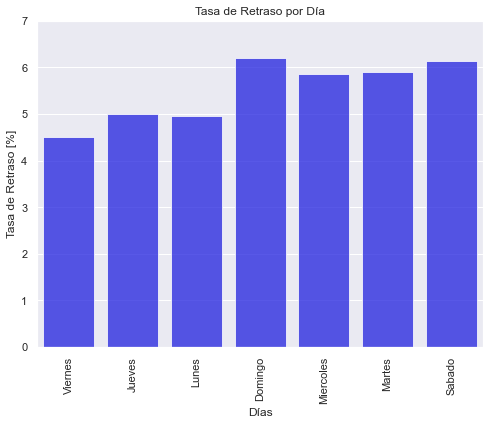

In [53]:
tasas_dias_values = df['DIANOM'].value_counts().index

sns.set(style="darkgrid")
plt.figure(figsize = (8,6))
sns.barplot(tasas_dias_values, tasas_dias['Tasa (%)'], color = 'blue', alpha = 0.75)
plt.title('Tasa de Retraso por Día')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Días', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,7)
plt.show()

In [54]:
tasas_temporada = calcular_tasa(df, 'temporada_alta')
tasas_temporada

,Tasa (%)
0,5.58
1,5.08


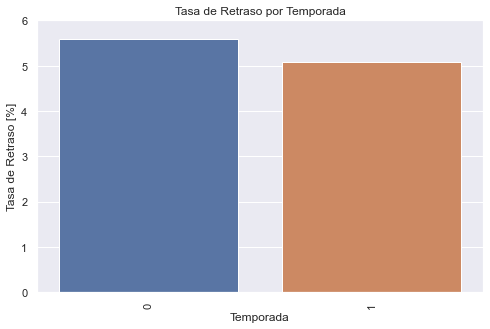

In [56]:
tasas_temporada_values = df['temporada_alta'].value_counts().index

plt.figure(figsize = (8, 5))
sns.set(style="darkgrid")
sns.barplot(tasas_temporada_values, tasas_temporada['Tasa (%)'])
plt.title('Tasa de Retraso por Temporada')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Temporada', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,6)
plt.show()

In [57]:
tasas_tipovuelo = calcular_tasa(df, 'TIPOVUELO')
tasas_tipovuelo

,Tasa (%)
N,6.64
I,4.43


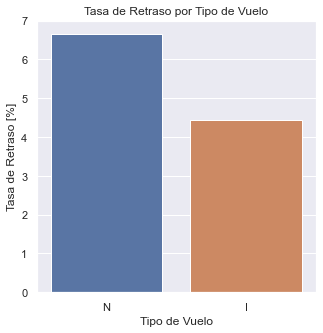

In [58]:
tasas_tipovuelo_values = df['TIPOVUELO'].value_counts().index

plt.figure(figsize = (5,5))
sns.set(style="darkgrid")
sns.barplot(tasas_tipovuelo_values, tasas_tipovuelo['Tasa (%)'])
plt.title('Tasa de Retraso por Tipo de Vuelo')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Tipo de Vuelo', fontsize=12)
plt.ylim(0,7)
plt.show()

In [59]:
tasa_periododia = calcular_tasa(df, 'periodo_dia')
tasa_periododia

,Tasa (%)
tarde,5.06
mañana,6.21
noche,5.02


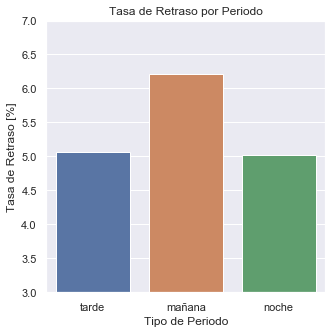

In [ ]:
tasas_periodo_values = df['periodo_dia'].value_counts().index

plt.figure(figsize = (5,5))
sns.set(style="darkgrid")
sns.barplot(tasas_periodo_values, tasa_periododia['Tasa (%)'])
plt.title('Tasa de Retraso por Periodo')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Tipo de Periodo', fontsize=12)
plt.ylim(3,7)
plt.show()

* ¿Qué variables esperarías que más influyeran en predecir atrasos?

Me parece que las que más podrían influir serían:
* **Aerolíneas**: Dependiendo de la calidad de gestión de cada aerolínea puede ser que afecte en sus programaciones. También puede que afecte el tipo de aerolínea, si es una low cost por ejemplo, estas llevan menos equipaje ya que es un costo extra para cada pasajero por lo que el tiempo de carga es menor, corriendo menor riesgo de retraso. 
* **Tipo de Vuelo**: esto puede afectar en cómo esté el clima del país de destino. Por ejemplo si se tiene que volar a argentina y se tiene que cruzar por la cordillera y hay un mal clima, es posible que se tenga que esperar un rato para poder salir.
* **Mes**: Esto va un poco de la mano con lo anterior, si es que es un mes del año donde el clima no es lo suficientemente adecuado, se tendría que esperar.  
 

### 4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas.

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
data = shuffle(df[['OPERA', 'MES', 'TIPOVUELO', 'SIGLADES', 'DIANOM', 'atraso_15']], random_state = 111)

In [ ]:
features = pd.concat([pd.get_dummies(data['OPERA'], prefix = 'OPERA'),pd.get_dummies(data['TIPOVUELO'], prefix = 'TIPOVUELO'), pd.get_dummies(data['MES'], prefix = 'MES')], axis = 1)
label = data['atraso_15']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.33, random_state = 42)

In [ ]:
x_train.shape, x_test.shape

((45698, 37), (22508, 37))

In [ ]:
y_train.value_counts('%')

0    0.813799
1    0.186201
Name: atraso_15, dtype: float64

In [ ]:
y_test.value_counts('%')

0    0.814644
1    0.185356
Name: atraso_15, dtype: float64

#### Utilizando Regresión logística

In [ ]:
logReg = LogisticRegression()
model = logReg.fit(x_train, y_train)

In [ ]:
y_pred = model.predict(x_test)

#### Métricas Regresión Logística

In [ ]:
confusion_matrix(y_test, y_pred)

array([[18311,    92],
       [ 3985,   120]], dtype=int64)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     18336
           1       0.56      0.03      0.05      4172

    accuracy                           0.82     22508
   macro avg       0.69      0.51      0.48     22508
weighted avg       0.77      0.82      0.74     22508



#### Utilizando XGBoost

In [ ]:
import xgboost as xgb
from xgboost import plot_importance

In [ ]:
modelxgb = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
modelxgb = modelxgb.fit(x_train, y_train)

In [ ]:
y_predxgb = modelxgb.predict(x_test)

#### Métricas XGBoost

In [ ]:
confusion_matrix(y_test, y_predxgb)

array([[18403,     0],
       [ 4105,     0]], dtype=int64)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     18403
           1       0.57      0.03      0.06      4105

    accuracy                           0.82     22508
   macro avg       0.69      0.51      0.48     22508
weighted avg       0.77      0.82      0.75     22508



#### Utilizando XGBoost dejando Features más importantes 

In [ ]:
modelxgb.feature_importances_

array([0.01169022, 0.        , 0.11834393, 0.        , 0.        ,
       0.06906034, 0.        , 0.        , 0.        , 0.10180488,
       0.        , 0.        , 0.00113403, 0.        , 0.00113216,
       0.        , 0.        , 0.16502443, 0.        , 0.00995141,
       0.0841885 , 0.00133777, 0.00850817, 0.13333023, 0.        ,
       0.        , 0.        , 0.        , 0.02873759, 0.        ,
       0.        , 0.08859437, 0.        , 0.03379857, 0.05050577,
       0.        , 0.09285758], dtype=float32)

<Figure size 936x720 with 0 Axes>

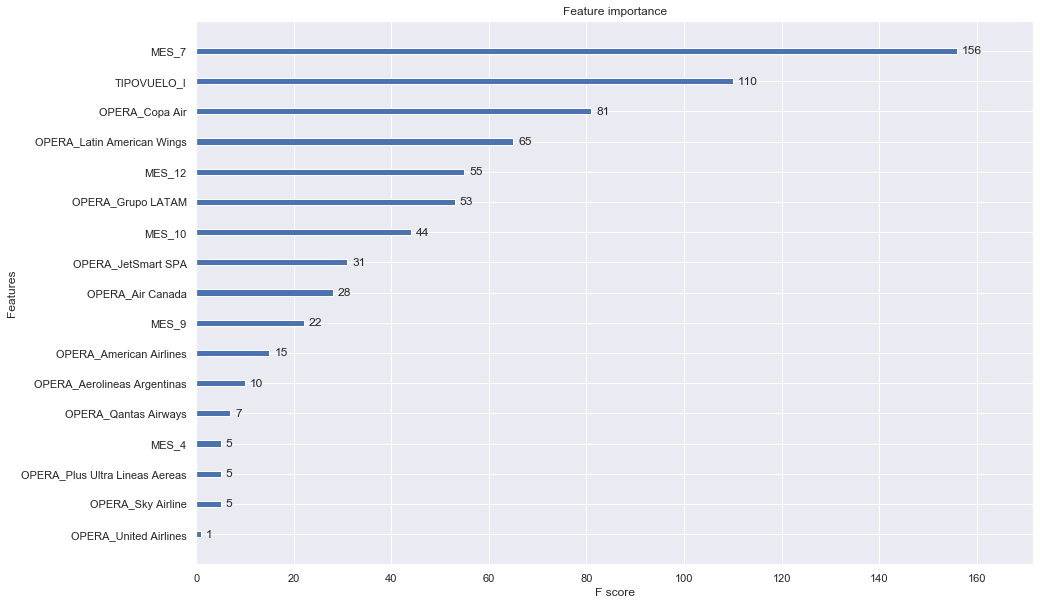

In [ ]:
plt.figure(figsize = (13,10))
plot_importance(modelxgb)

In [ ]:
features_importantes = features[['MES_7', 'TIPOVUELO_I', 'OPERA_Copa Air', 'OPERA_Latin American Wings',
                                'MES_12', 'OPERA_Grupo LATAM', 'MES_10', 'OPERA_JetSmart SPA', 'OPERA_Air Canada',
                                'MES_9', 'OPERA_American Airlines']]
labels_ = label

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(features_importantes, labels_, test_size = 0.33, random_state = 42)

In [ ]:
modelxgb = xgb.XGBClassifier(random_state=1, learning_rate=0.01, subsample = 1, max_depth = 10)
modelxgb = modelxgb.fit(x_train2, y_train2)

In [ ]:
y_predxgb = modelxgb.predict(x_test2)

#### Métricas XGBoost dejando Features más importantes 

In [ ]:
confusion_matrix(y_test2, y_predxgb)

array([[18371,    32],
       [ 4044,    61]], dtype=int64)

In [ ]:
print(classification_report(y_test2, y_predxgb))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     18403
           1       0.66      0.01      0.03      4105

    accuracy                           0.82     22508
   macro avg       0.74      0.51      0.46     22508
weighted avg       0.79      0.82      0.74     22508



### 5. Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar laperformance?

Los modelos utilizados en la sección anterior fueron:
* **Regresión Logística**: Fue seleccionado ya que es el modelo más simple para poder resolver problemas de clasificación.
* **XGBoost**: Fue seleccionado porque en general tiene un gran desempeño y entrega buenos resultados ya sea para regresión y clasificación, además es bastante rápido y facilita el tuneo de hiperparámetros.

Los resultados obtenidos con ambos modelos fueron muy malos. Se utilizó matriz de confusión para validar los resultados. La cantidad de falsos negativos fue muy alta. Una de las posibles razones, la más clara, es el desbalanceo que existe en la clase 'atraso_15'. Del total de datos un 82% corresponde a no atraso y el 18% restante a atraso.
Para poder mejorar la performance se tomaron dos decisiones, la primera aplicar un Grid Search CV sobre XGBoost para tunear de mejor manera los hiperparámetros y la segunda realizar un upsampling de la clase desbalanceada, en este caso los atrasos.



### Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {
                'learning_rate': [0.01,0.05, 0.1],
                'n_estimators': [50, 100, 150],
                'subsample': [0.5, 0.9]
}

modelxgb_GridCV = GridSearchCV(modelxgb, param_grid = parameters,
    cv = 2, n_jobs=-1, verbose=1).fit(x_train, y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   36.0s finished


In [ ]:
y_predxgb_grid = modelxgb_GridCV.predict(x_test)

In [ ]:
confusion_matrix(y_test, y_predxgb_grid)

array([[18314,    89],
       [ 3956,   149]], dtype=int64)

### Upsampling

In [ ]:
data['atraso_15'].value_counts()

0    55592
1    12614
Name: atraso_15, dtype: int64

In [ ]:
#Resample
from sklearn.utils import resample

data_no_retraso = data[data['atraso_15'] == 0]
data_atraso = data[data['atraso_15'] == 1]

data_atraso_upsampled = resample(data_atraso, 
                                 replace = True,     # sample with replacement
                                 n_samples = 30000,    # to match majority class
                                 random_state = 42) # reproducible results

data_upsampled = pd.concat([data_no_retraso, data_atraso_upsampled])

In [ ]:
data_upsampled['atraso_15'].value_counts()

0    55592
1    30000
Name: atraso_15, dtype: int64

In [ ]:
features_upsampled = pd.concat([pd.get_dummies(data_upsampled['OPERA'], prefix = 'OPERA'),pd.get_dummies(data_upsampled['TIPOVUELO'], prefix = 'TIPOVUELO'), pd.get_dummies(data_upsampled['MES'], prefix = 'MES')], axis = 1)
label_upsampled = data_upsampled['atraso_15']

In [ ]:
x_upsampled_train, x_upsampled_test, y_upsampled_train, y_upsampled_test = train_test_split(features_upsampled, label_upsampled, test_size = 0.33, random_state = 42)

In [ ]:
modelxgb = xgb.XGBClassifier(random_state=1, learning_rate=0.01, subsample = 1, max_depth = 10)
modelxgb.fit(x_upsampled_train, y_upsampled_train)

In [ ]:
y_upsampled_predxgb = modelxgb.predict(x_upsampled_test)

In [ ]:
confusion_matrix(y_upsampled_test, y_upsampled_predxgb)

array([[17156,  1193],
       [ 7969,  1928]], dtype=int64)

In [ ]:
modelxgb.score(x_upsampled_test, y_upsampled_test)

0.6756354882107201

In [ ]:
print(classification_report(y_upsampled_test, y_upsampled_predxgb))

              precision    recall  f1-score   support

           0       0.68      0.93      0.79     18349
           1       0.62      0.19      0.30      9897

    accuracy                           0.68     28246
   macro avg       0.65      0.56      0.54     28246
weighted avg       0.66      0.68      0.62     28246



Observando los dos métodos para incrementar la performance, se puede ver como el modelo no mejoró. Esto puede ser ya que la data creada al upsamplear no tiene ningún sentido. Si se pudiese pudiese balancear la clase tal vez los modelos tendrían un mejor desempeño.

### Métricas para evaluación de modelos con datos desbalanceados 

#### Efecto de datos desbalanceados

- El accuracy es engañosa

El rendimiento de los algoritmos de aprendizaje automático se evalúa normalmente mediante el accuracy. Sin embargo, esto no es apropiado cuando los datos están desbalanceados y/o los costos de los diferentes errores varían significativamente, ya que se puede obtener una alta precisión al predecir solo la clase mayoritaria, sin tomar en cuenta la clase minoritaria, que suele ser el objetivo por el cual se realiza el modelo de clasificación.

Por ejemplo, se puede utilizar un conjunto de datos que contenga transacciones realizadas con tarjetas de crédito en Europa en septiembre de 2013. Se está interesado en predecir si una persona incumplirá con el pago de su tarjeta. Se observa que de las 284,807 transacciones registradas, solo 492 corresponden a personas que incumplieron con el pago de su tarjeta (0.2 %). Por lo tanto, un modelo que clasifique todas las observaciones como no fraudulentas obtendría un accuracy igual a 99.8 %. Esta precisión sería alta simplemente porque la mayoría de las transacciones no son fraudulentas y no porque el modelo sea bueno.

- AUC ROC es demasiado optimista
La curva Receiver Operating Characteristics (ROC) y el área bajo la curva ROC (AUROC) se han convertido en la métrica más común para evaluar un modelo de clasificación.

El área bajo la curva (AUROC) es una métrica de rendimiento que se puede utilizar para evaluar modelos de clasificación. AUROC permite medir si un modelo puede clasificar correctamente los ejemplos. AUROC es una métrica de rendimiento para la “discriminación”: permite medir la capacidad del modelo para discriminar entre casos (ejemplos positivos) y no casos (ejemplos negativos). Un AUROC de 0.8 significa que el modelo tiene una buena capacidad de discriminación: en el 80 % de las ocasiones, el modelo asignará correctamente un riesgo absoluto más alto a un paciente seleccionado al azar con un evento que a un paciente seleccionado al azar sin un evento.

El peor AUROC es 0.5 y el mejor AUROC es 1.0.

Sin embargo, cuando la clase negativa es más frecuente pero hay un valor bajo en las predicciones negativas verdaderas, esta métrica no presenta buenos resultados.

Por ejemplo, considere el caso de un conjunto de datos que tiene 10 positivos y 100,000 negativos. Se dispone de 2 modelos:

- Modelo A: predice 900 positivos, de los cuales 9 son verdaderos positivos.
- Modelo B: predice 90 positivos, de los cuales 9 son verdaderos positivos.

Obviamente, el Modelo B tiene un mejor rendimiento. Aunque ambos predicen el mismo número de positivos, el Modelo B no genera tantos falsos positivos. En otras palabras, el Modelo B es más “preciso”. Sin embargo, considere el análisis ROC de los dos modelos, que mide la tasa de verdaderos positivos (TPR) contra la tasa de falsos positivos (FPR):

- Modelo A: TPR = 9/10 = 0.9 y FPR = (900–9) / 100,000 = 0.00891 Modelo B: TPR = 9/10 = 0.9 y FPR = (90–9) / 100,000 = 0.00081

Como era de esperar, TPR es exactamente el mismo entre ambos modelos. Por otro lado, dado que el número de negativos domina en gran medida al de positivos, la diferencia de FPR entre ambos modelos (0.00891-0.00081 = 0.0081) se pierde en el sentido de que se puede redondear a casi 0.

En otras palabras, un gran cambio en el número de falsos positivos resultó en un pequeño cambio en el FPR y, por lo tanto, la curva ROC no puede reflejar el desempeño superior del Modelo B en el contexto de que los verdaderos negativos no son relevantes para el problema.

- Precision-Recall

En contraste, la curva Precision-Recall (PR) está diseñada específicamente para la detección de eventos raros y es la métrica que debe usarse cuando la clase positiva es de más interés que la negativa.

Debido a que la precisión y la recall no consideran verdaderos negativos, la curva PR no se ve afectada por el desequilibrio de datos. Volviendo al ejemplo anterior:
Modelo A: Recall = TPR = 0.9 y Precision = 9/900 = 0.01 Modelo B: Recall = TPR = 0.9 y Precision = 9/90 = 0.1

Claramente, el análisis de PR es más informativo en comparación con el análisis de la curva ROC.

### Entrenamiento o Training del modelo de clasifiacion binario
Como sabemos, nuestro conjunto de datos está desbalanceado, por lo que observamos metricas bajas aun haciando un rasample. sugiero lo siguiente:

- Crear un entrenamiento con datos balanceados mediante sobremuestreo: igualaremos las clases aumentando los datos de la clase con menos información. Es probable que obtengamos una precisión aceptable o buena y un nivel de recuperación similar entre las etiquetas.

- Crear un pipeline para el modelo y asi poder automatizar algunas transformaciones.

- Evaluar otros modelos como Random forest o redes neuronales

In [1]:
# Importar las librerías necesarias
import latam_airlines_mle.utils.paths as path
from latam_airlines_mle.utils.latam_utils import modelPipeline, get_model_performance_test_set, save_simple_metrics_report, update_model

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
rs = {'random_state': 42}

In [2]:
# leemos el dataset de training
data_train = pd.read_csv(path.data_processed_dir('data_ready.csv'))
# Obtiene las características y la variable objetivo
X = data_train.drop("atraso_15", axis=1)
y = data_train["atraso_15"]

# Crear una pipeline que incluya el ColumnTransformer
# Crear un objeto ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler( with_mean=False), ['DIA', 'MES', 'HORA', 'MIN','temporada_alta']),
        ('cat-nominal', OneHotEncoder(), ['periodo_dia','DIANOM','Des_I', 'TIPOVUELO', 'OPERA'])
    ],
    )

#transformar datos
X_transform = preprocessor.fit_transform(X)

# Aplica SMOTE para generar datos sintéticos
smote = SMOTE(sampling_strategy='minority',random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_transform, y)

# Inversión de la transformación de escalamiento
scaler = preprocessor.named_transformers_['num']
X_scaled = scaler.inverse_transform(X_resampled[:, :5])

# Inversión de la transformación One-hot
onehot = preprocessor.named_transformers_['cat-nominal']
X_onehot = X_resampled[:, 5:]
X_original = onehot.inverse_transform(X_onehot)

# Concatena los valores originales y convierte el resultado en un DataFrame
X_recovered = np.concatenate([X_scaled.toarray().astype(int), X_original], axis=1)

In [3]:
data_train_balanced = pd.DataFrame(X_recovered, columns=X.columns)
data_train_balanced["atraso_15"] = y_resampled

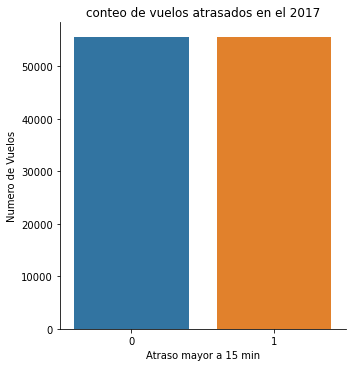

In [4]:
sns.catplot(
    data= data_train_balanced,
    x='atraso_15',
    kind='count',
)
plt.xlabel('Atraso mayor a 15 min')
plt.ylabel('Numero de Vuelos')
plt.title('conteo de vuelos atrasados en el 2017')
plt.show()

In [5]:
# borarr duplicados de datos sinteticos
data_train_balanced.drop_duplicates(inplace=True) 

In [6]:
# Guarda el dataset balanceado en un archivo
data_train_balanced.to_csv(path.data_processed_dir('data_train_balanced.csv'), index=False)

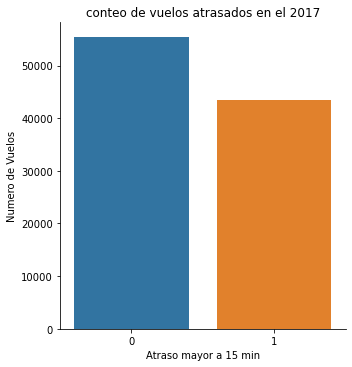

In [7]:
sns.catplot(
    data= data_train_balanced,
    x='atraso_15',
    kind='count',
)
plt.xlabel('Atraso mayor a 15 min')
plt.ylabel('Numero de Vuelos')
plt.title('conteo de vuelos atrasados en el 2017')
plt.show()

In [8]:
# Dividir los datos en variables de entrada y salida
X = data_train_balanced.drop('atraso_15', axis=1)
y = data_train_balanced['atraso_15']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
pipelines, scores_df = modelPipeline(X_train, X_test, y_train, y_test)
scores_df

/Users/fhurtado/miniconda3/envs/latam_airlines_mle/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fhurtado/Documents/my_repos/latam_airlines_mle/latam_airlines_mle/utils/latam_utils.py:122: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_df = scores_df.append({
/Users/fhurtado/Documents/my_repos/latam_airlines_mle/latam_airlines_mle/utils/latam_utils.py:122: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_df = scores_df.append({
/Users/fhurtado/Documents/my_repos/latam_airlines_mle/latam_airlines_mle/utils/latam_utils.py:122: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_df = scores_df.

,Model,F1_Score,Precision,Recall,Accuracy
0,Logistic Regression,0.607502,0.615174,0.620268,0.620268
1,MLP,0.707915,0.709665,0.707144,0.707144
2,Decision Tree,0.775661,0.77711,0.775107,0.775107
3,Random Forest,0.840783,0.841013,0.840643,0.840643
4,XGBoost,0.775865,0.779817,0.778681,0.778681


Se escoge el modelo que mejor metricas presente, aca demebmos tomar en cuenta que el modelo de RandomForestClassifier es algo pesado comparado con los demas modelos.

In [10]:
# Crear una pipeline que incluya el ColumnTransformer y el RandomForestClassifier
# Crear un objeto ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler( with_mean=False), ['DIA', 'MES', 'HORA', 'MIN','temporada_alta']),
        ('cat-nominal', OneHotEncoder(), ['periodo_dia','DIANOM','Des_I', 'TIPOVUELO', 'OPERA'])
    ],
    )
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model',RandomForestClassifier(**rs))
    ]
)

# realizar validacion cruzada
final_result = cross_validate(pipe, X_train, y_train, return_train_score=True, cv=5)
#observamos la dispersion del score
train_score_std = np.std(final_result['train_score'])
test_score_std = np.std(final_result['test_score'])
print('Dispersion del score en la validacion cruzada')
print(f'Dispersion train score: {train_score_std}')
print(f'Dispersion test score: {test_score_std}')

# Observamos la media del score
train_score_mean = np.mean(final_result['train_score'])
test_score_mean = np.mean(final_result['test_score'])
print('media del score en la validacion cruzada')
print(f'media train score: {train_score_mean}')
print(f'media test score: {test_score_mean}')


# Entrenar modelo
pipe.fit(X_train, y_train)

# Mostrar los resultados
validation_score =pipe.score(X_test, y_test)
y_pred = pipe.predict(X_test)

/Users/fhurtado/miniconda3/envs/latam_airlines_mle/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/fhurtado/miniconda3/envs/latam_airlines_mle/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/fhurtado/miniconda3/envs/latam_airlines_mle/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/fhurtado/miniconda3/envs/latam_airlines_mle/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "/Users/fhurtado/miniconda3/envs/latam_airlines_mle/lib/python3.9/site-packages/sklearn/pipeline.py", line 707, i

Dispersion del score en la validacion cruzada
Dispersion train score: 0.0001036885497698236
Dispersion test score: nan
media del score en la validacion cruzada
media train score: 0.998287869064173
media test score: nan


In [11]:
# Imprimiendo el reporte de clasificación
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.85      0.86     16691
           1       0.81      0.83      0.82     12972

    accuracy                           0.84     29663
   macro avg       0.84      0.84      0.84     29663
weighted avg       0.84      0.84      0.84     29663



Se puede concluir lo siguiente:

- Para la clase 0 (no atraso), el 89% de los casos clasificados como no atrasados son realmente no atrasados, lo que indica una precisión del 89%.
- Para la clase 0 (no atraso), el modelo tiene un recall del 86%, lo que significa que el 86% de los casos reales de no atraso son identificados correctamente por el modelo.
- Para la clase 1 (atraso), el modelo tiene una precisión del 81%, lo que indica que el 82% de los casos clasificados como atrasados son realmente atrasados.
- Para la clase 1 (atraso), el modelo tiene un recall del 85%, lo que significa que el 83% de los casos reales de atraso son identificados correctamente por el modelo.
- El accuracy general del modelo es del 86%, lo que significa que el modelo predice correctamente el 84% de las veces en promedio.

Aunque se podría realizar un ajuste de hiperparámetros del modelo RandomForest, los resultados obtenidos son satisfactorios. Por lo tanto, se procede a guardar el modelo y sus métricas.

get_model_performance_test_set('cm_balanced_over', y_test, y_pred)

In [12]:
save_simple_metrics_report('report_balanced_over', train_score_mean, test_score_mean, validation_score, report, pipe)
update_model('model_balanced_over',pipe)

### Validaremos con los datos reales usando las mismas metricas

In [13]:
from latam_airlines_mle.utils.latam_utils import get_model

In [14]:
pipe = get_model('model_balanced_over.pkl')

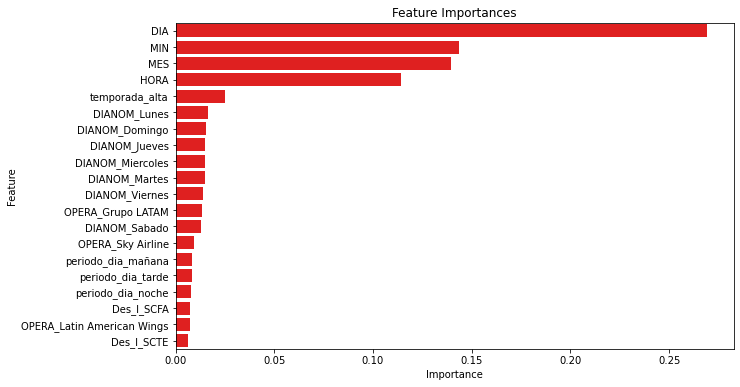

In [15]:
feature_names = pipe['preprocessor'].get_feature_names_out()
feature_names = list(map(lambda x: x.split('__'), feature_names))
feature_names = [elem[1] for elem in feature_names]

# create a DataFrame with feature names and importances
feature_importances = pd.DataFrame(zip(feature_names, pipe['model'].feature_importances_), columns=['feature', 'importance'])

# sort features by importance in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False)

# plot feature importances using a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances.head(20), color='red')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [16]:
feature_importances['importance'].head(5).sum()

0.6918437320939618

el top 5 de las caracteristicas de mayor peso reune el 69% de la explicacion del modelo el top 5 son el dia, minuto, hora, mes y temporada_alta, esto significando que la fecha hasta el minuto tien un gran peso en el modelo dando luces de que se puede afrontar el modelo como series de tiempo.

In [17]:
import pandas as pd
import lime
import lime.lime_tabular
from latam_airlines_mle.utils.latam_utils import get_model
import latam_airlines_mle.utils.paths as path

from sklearn.model_selection import train_test_split

In [18]:
data_train_balanced = pd.read_csv(path.data_processed_dir('data_train_balanced.csv'))
# Dividir los datos en variables de entrada y salida
X = data_train_balanced.drop('atraso_15', axis=1)
y = data_train_balanced['atraso_15']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
feature_names = pipe['preprocessor'].get_feature_names_out()
feature_names = list(map(lambda x: x.split('__'), feature_names))
feature_names = [elem[1] for elem in feature_names]

predict_fn_rf = lambda x: pipe['model'].predict_proba(x).astype(float)
X = pipe['preprocessor'].transform(X_train)
explainer = lime.lime_tabular.LimeTabularExplainer(X, feature_names = feature_names, class_names=['No Atraso','Atraso'], kernel_width=5)


In [20]:

choosen_instance = pipe['preprocessor'].transform(X_test.iloc[[1]])
exp = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=10)
exp.show_in_notebook(show_all=False)

Modelo predicho No atraso. El mayor efecto es el periodo del dia, lo que ha aumentado significativamente sus probabilidades de No atrasarse. El destino también ha contribuido a aumentar sus posibilidades. Sin embargo, el hecho de que el vuelo sea internacional y con operador Grupo LATAM aumenta sus posibilidades de atraso.

5. Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la performance?

### Concluimos
¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué?
- Los datos de entrenamiento con sobre-muestreo o creacion de datos sinteticos usando el modelo RandomForestClassifier tiene el mejor desempeno con un accuracy del 86%
- Usamos las metricas de Precision y Recall(PR) para medir que tan bueno fue el modelo al momento de detectar atraso de un vuelo dandonos un 81% y 86% Respectivamente.

¿Por qué elegiste ese algoritmo en particular?
- se elijio este algoritmo por que fue el que mejor metricas presento.
- podriamos hacer una iteracion de los hiperparametros del XGboost pero tomando en cuenta la diferencia en las metricas entre ambos modelos, tardariamos en llegar al resultado de Random Forest.
- Random Forest es un modelo de emsable de tipo bagging, osea varios expertos tomando decisiones en paralelo

¿Qué variables son las que más influyen en la predicción?
- El top 5 de las variables son las que más influyen en la predicción son dia, minuto, hora, mes y temporada reuniendo el 69% del peso para hacer una prediccion.

¿Cómo podrías mejorar la performance?
- Podriamos agregar variables externas como el clima en determinado momento, horas de vuelo del piloto, horas acumuladas del piloto en el dia, mantenimiento de la aeronave, capacidad o referencia del aernave.